## Reading and Understanding the data

Let us import Numpy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Issue

1. The instant column is irrelevant for our analysis as it merely serves as an index.
2. There are few categorical column which is in numerical format in the dataset such as year, season, weekday, holiday, and workingday. These all column needs to be convert it into categorical string type.
3. Dropping the 'dteday' variable is acceptable since we already have a column for a year, month, and weekday.
4. Dropping the 'casual' and 'registered' variable is justified as there values are encompassed by the 'cnt' variable

## Data Cleaning

In [8]:
# Dropping redundant variables

bike = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Encoding the Dataset


For improved clarity, we will convert certain categorical numerical columns, such as "season," "mnth," "weekday," and "weathersit," into categorical string columns. This adjustment is made to enhance the readability of the data, as these columns represent categorical information that is not easily understandable in numerical form

In [10]:
#Converting all the categorical columns data into readable data for further use

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth']= bike['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August'
                                                              ,'September','October','November','December'))
bike['weekday']= bike['weekday'].replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
bike['weathersit'] = bike['weathersit'].replace((1,2,3,4),('Clear', 'Mist', 'Light Snow', 'Heavy Rain'))
bike['yr'] = bike['yr'].replace((0,1),(2018, 2019))

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualizing the dataset

In [13]:
# importing visualizing library

import matplotlib.pyplot as plt
import seaborn as sns

### visualizing numerical variables

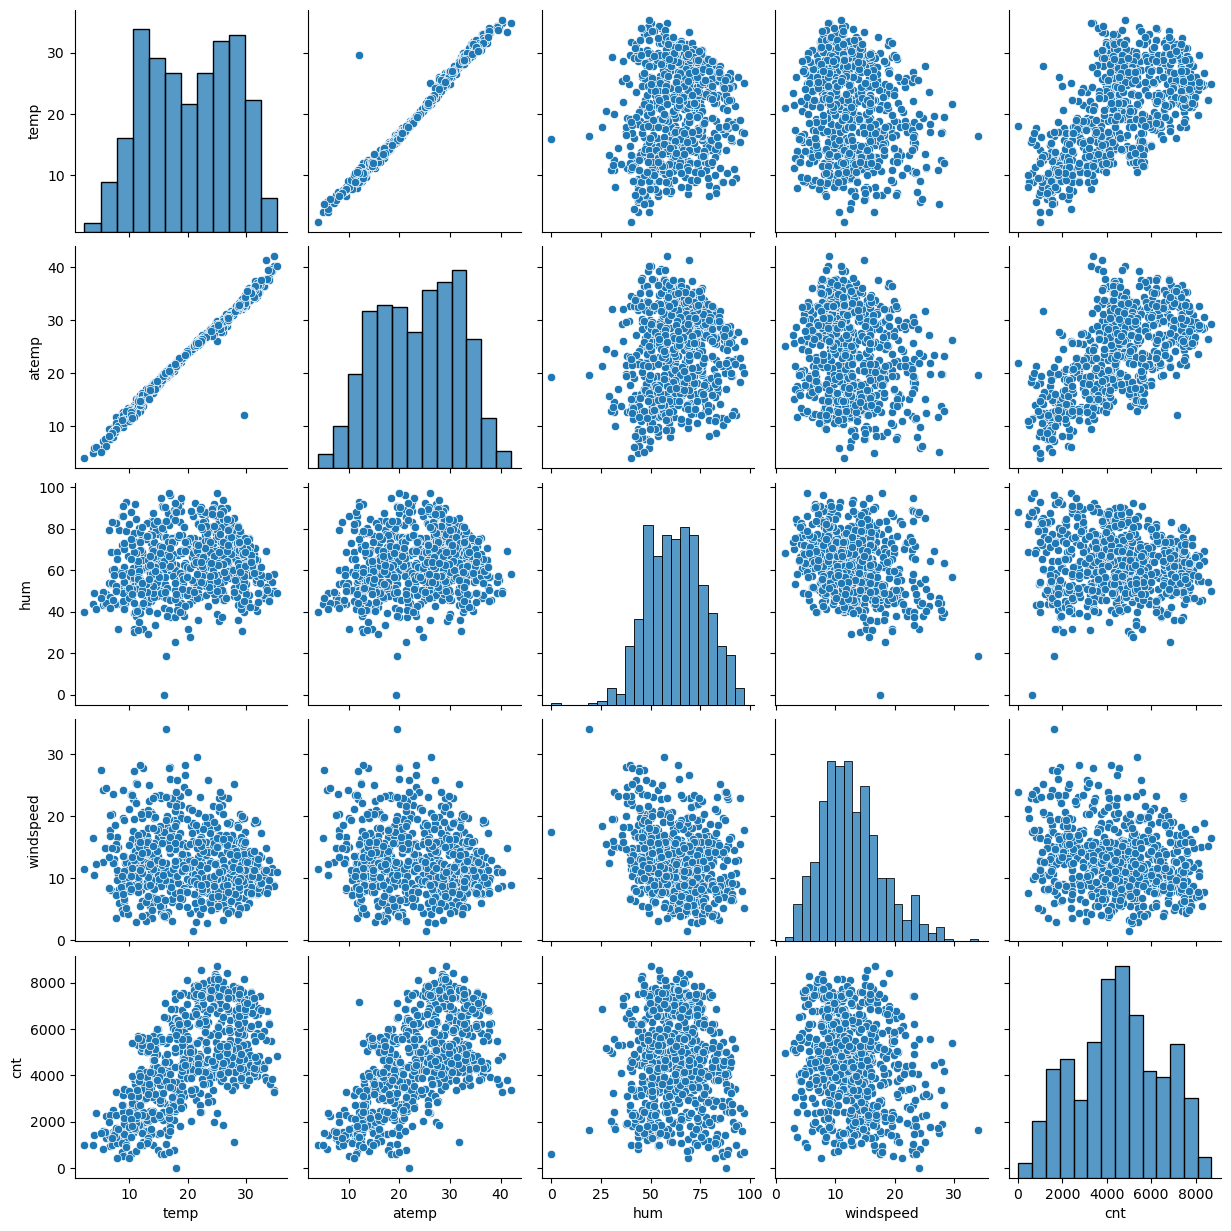

In [14]:
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike[num_var])
plt.show()

### visualizing categorical variables

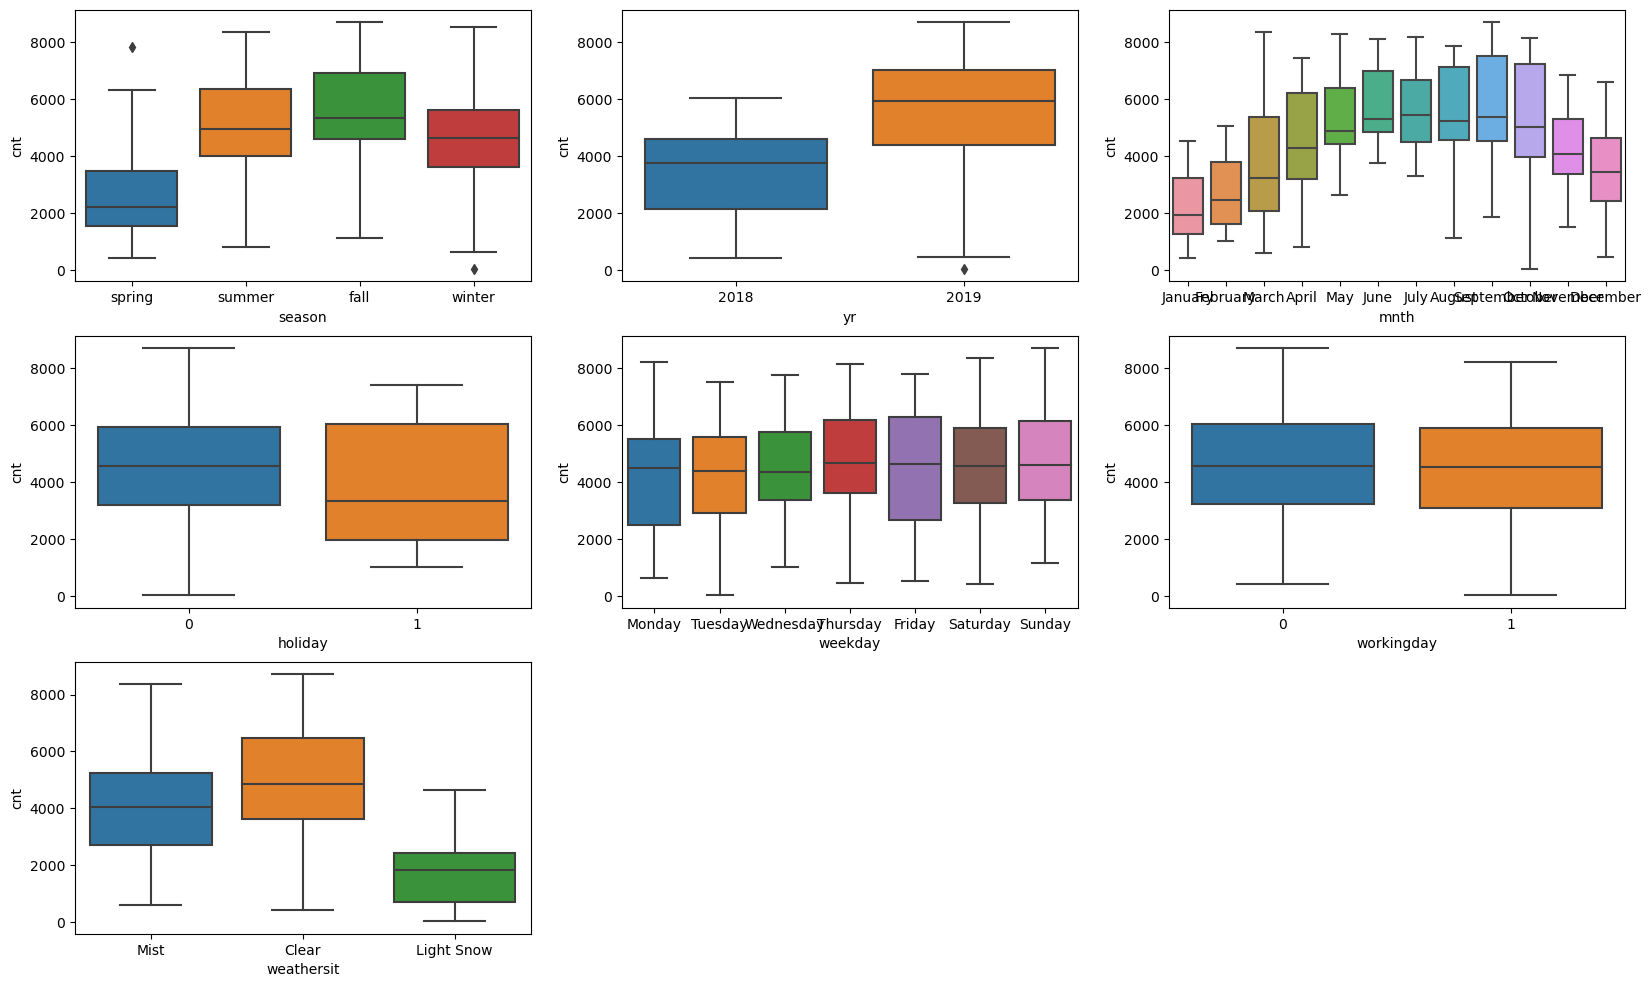

In [15]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(data=bike, x='season', y='cnt')

plt.subplot(3,3,2)
sns.boxplot(data=bike, x='yr', y='cnt')

plt.subplot(3,3,3)
sns.boxplot(data=bike, x='mnth', y='cnt')

plt.subplot(3,3,4)
sns.boxplot(data=bike, x='holiday', y='cnt')

plt.subplot(3,3,5)
sns.boxplot(data=bike, x='weekday', y='cnt')

plt.subplot(3,3,6)
sns.boxplot(data=bike, x='workingday', y='cnt')

plt.subplot(3,3,7)
sns.boxplot(data=bike, x='weathersit', y='cnt')

plt.show()

In [16]:
bike['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

It's evident from the data that there is no bike rented during heavy rains period which is very obvious.

### Observing and analyzing the season variable yearwise


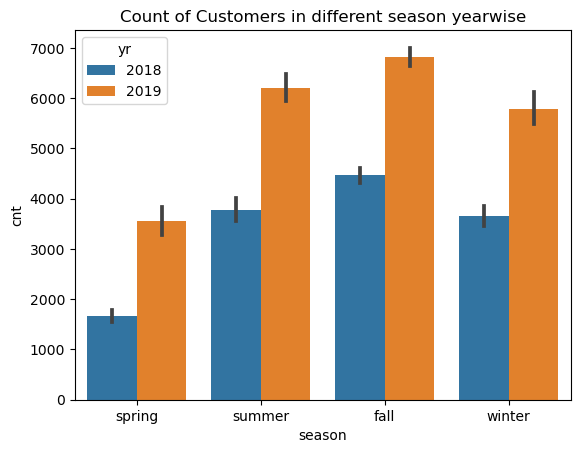

In [17]:
sns.barplot(data=bike, x='season', y='cnt', hue='yr')
plt.title('Count of Customers in different season yearwise')
plt.show()

As we can see that, the bikes are rented majorly in summer and fall season as compared to other season

In [18]:
#Checking the percentage of each value in that season variable
bike['season'].value_counts(normalize=True)*100

fall      25.753425
summer    25.205479
spring    24.657534
winter    24.383562
Name: season, dtype: float64

### Observing and analyzing the month variable yearwise


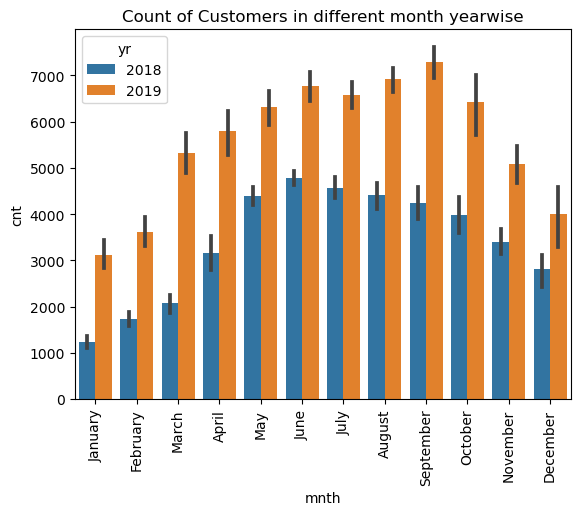

In [19]:
sns.barplot(data=bike, x='mnth', y='cnt', hue='yr')
plt.title('Count of Customers in different month yearwise')
plt.xticks(rotation=90)
plt.show()

As we can see that, the bikes are rented majorly in June, July, August, September

In [20]:
#Checking the percentage of each value in that month variable
bike['mnth'].value_counts(normalize=True)*100

January      8.493151
March        8.493151
May          8.493151
July         8.493151
August       8.493151
October      8.493151
December     8.493151
April        8.219178
June         8.219178
September    8.219178
November     8.219178
February     7.671233
Name: mnth, dtype: float64

### Observing and analyzing the weekday variable yearwise


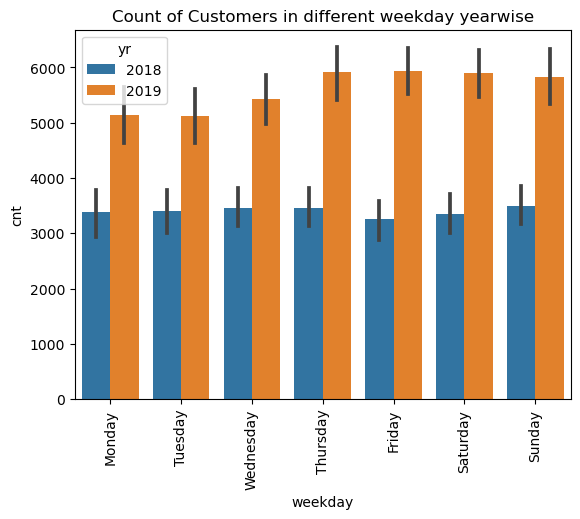

In [21]:
sns.barplot(data=bike, x='weekday', y='cnt', hue='yr')
plt.title('Count of Customers in different weekday yearwise')
plt.xticks(rotation=90)
plt.show()

As we can see that, the bikes are rented majorly in thursday, friday, saturday and sunday

In [22]:
#Checking the percentage of each value in that weekday variable
bike['weekday'].value_counts(normalize=True)*100

Monday       14.383562
Tuesday      14.383562
Wednesday    14.246575
Thursday     14.246575
Friday       14.246575
Saturday     14.246575
Sunday       14.246575
Name: weekday, dtype: float64

### Observing and analyzing the holiday variable yearwise


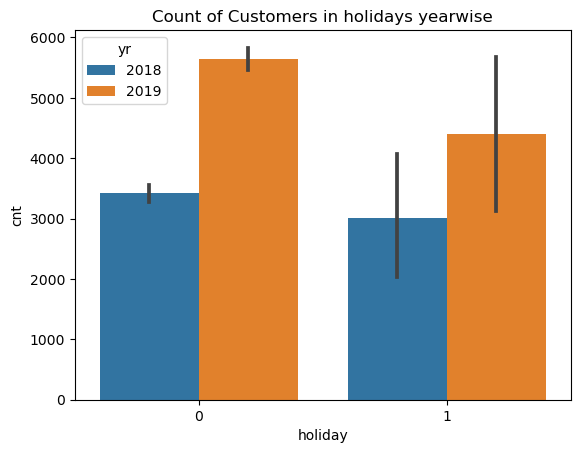

In [23]:
sns.barplot(data=bike, x='holiday', y='cnt', hue='yr')
plt.title('Count of Customers in holidays yearwise')
plt.show()

In [24]:
#Checking the percentage of each value in that holiday variable
bike['holiday'].value_counts(normalize=True)*100

0    97.123288
1     2.876712
Name: holiday, dtype: float64

### Observing and analyzing the workingday variable yearwise


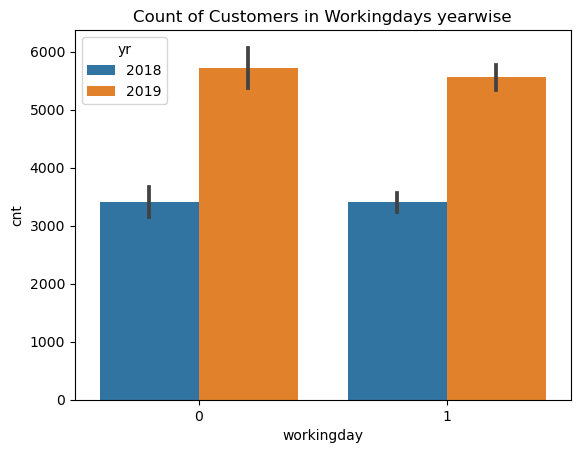

In [25]:
sns.barplot(data=bike, x='workingday', y='cnt', hue='yr')
plt.title('Count of Customers in Workingdays yearwise')
plt.show()

The patterns appear consistent between working days and non-working days.

In [26]:
#Checking the percentage of each value in that workingday variable
bike['workingday'].value_counts(normalize=True)*100

1    69.041096
0    30.958904
Name: workingday, dtype: float64

### Observing and analyzing the weathersit variable yearwise


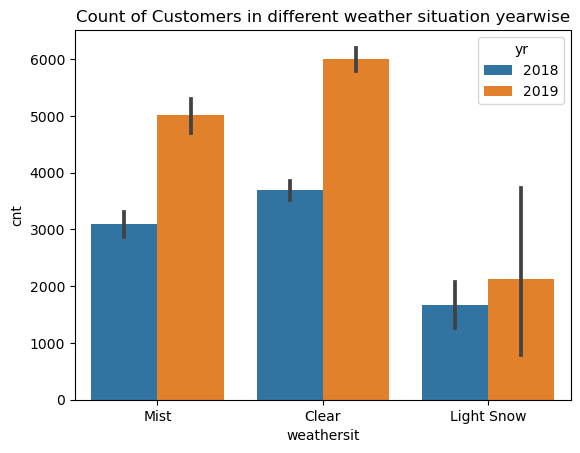

In [27]:
sns.barplot(data=bike, x='weathersit', y='cnt', hue='yr')
plt.title('Count of Customers in different weather situation yearwise')
plt.show()

The pattern appears that the bikes are rented majorly when the weather is cleared

In [28]:
#Checking the percentage of each value in that season variable
bike['weathersit'].value_counts(normalize=True)*100

Clear         63.424658
Mist          33.698630
Light Snow     2.876712
Name: weathersit, dtype: float64

## Preparing Data for Data Modelling


In [29]:
# creating dummy variable for season

season = pd.get_dummies(bike['season'], drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
# creating dummy variable for months

month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# creating dummy variable for weekdays

weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [32]:
# creating dummy variable for weathersit

weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)
weathersit.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In an ideal scenario, we would expect three columns to represent the four levels, but currently, we only have two columns since there are no entries specifically denoting heavy rain in the dataset.

In [33]:
# concatenating all the dummy variable dataset into one dataframe

bike_new = pd.concat([bike, season, month, weekday, weathersit], axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,spring,2018,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# dropping the previous variables

bike_new = bike_new.drop(['season', 'mnth', 'weekday', 'weathersit'], axis =1)

In [35]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,2018,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#checking the shape of the new dataframe

bike_new.shape

(730, 30)

In [37]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

As we can see that, there are no null values in any of the variables and all the variables are in numeric format. Now we are good to go for data modelling

## Splitting the dataset into training and testing set

In [38]:
# importing library for train-test split

from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [39]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


## Rescaling the Features 


In [40]:
#importing library for scaling

from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
# Applying the scaling on the train set in numerical variables 

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_var] = scaler.fit_transform(bike_train[num_var])

In [43]:
#checking the training dataset after rescaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,2019,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,2018,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


## Plotting heatmap to see which variables are highly correlated


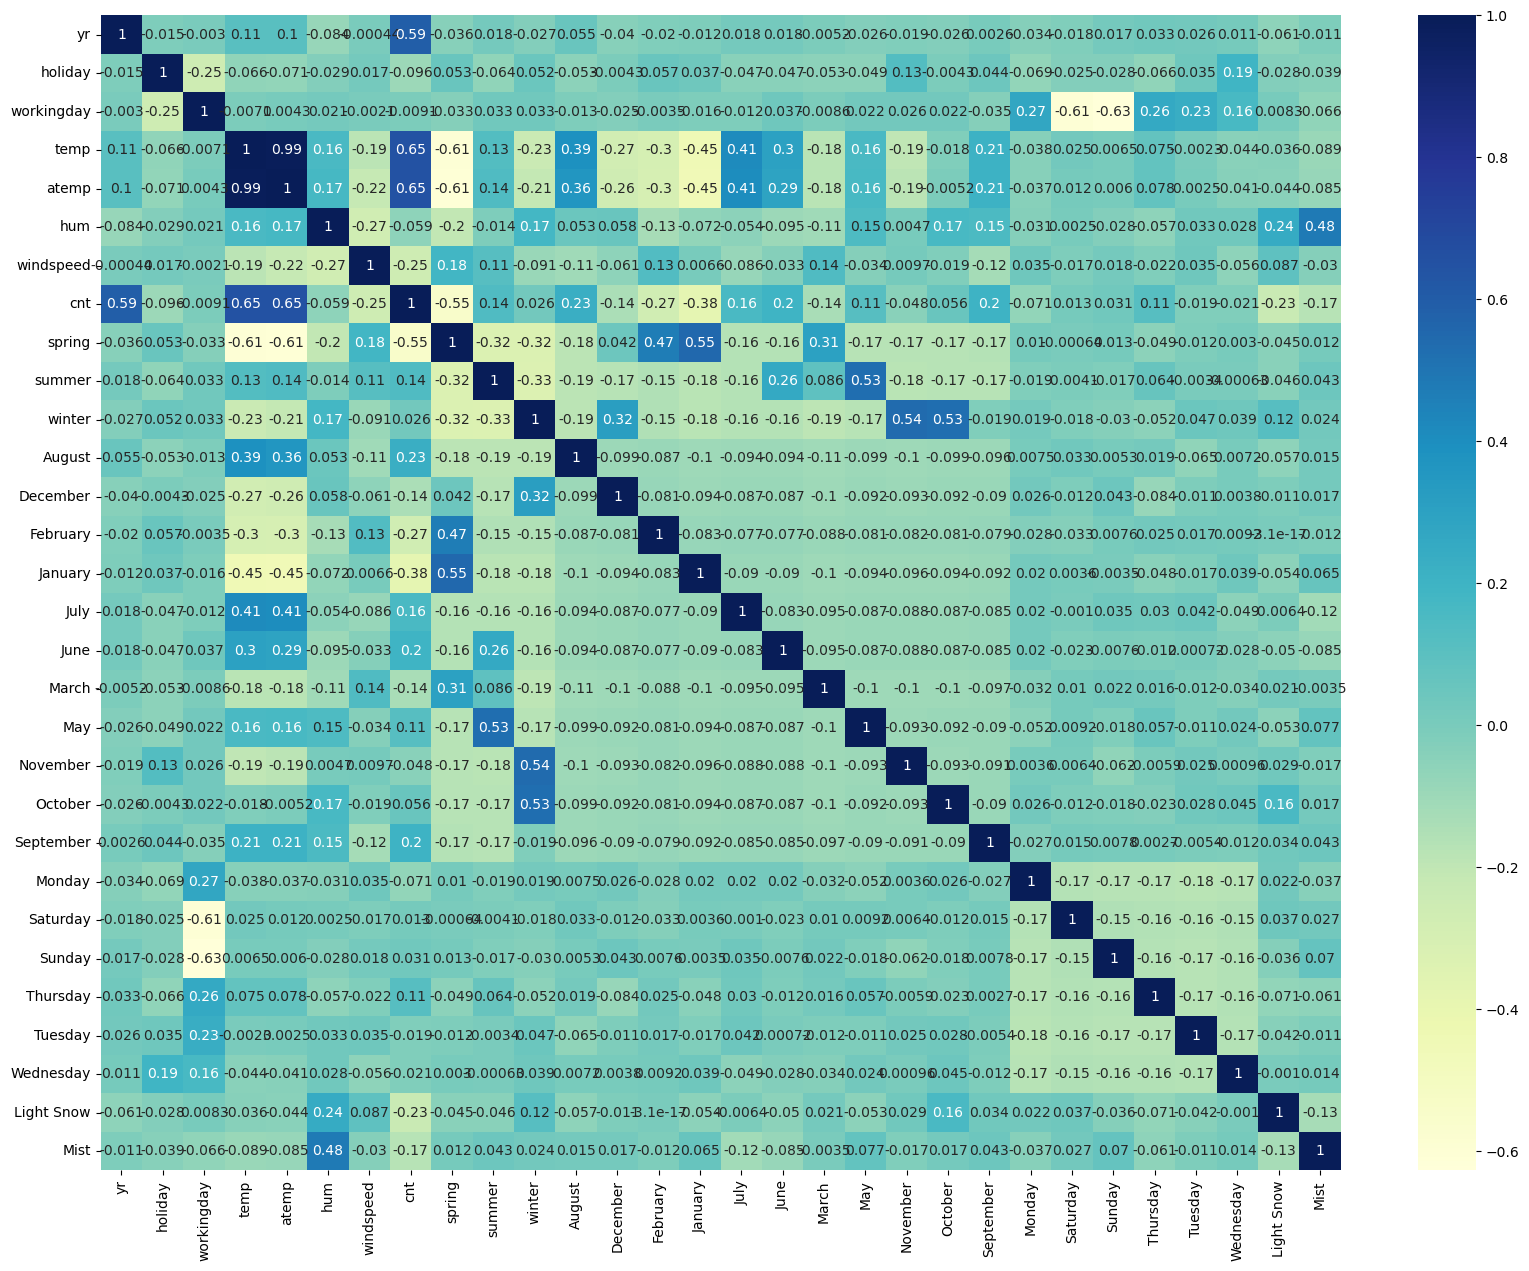

In [44]:
plt.figure(figsize = (20,15))
sns.heatmap(bike_train.corr(), annot= True, cmap = 'YlGnBu')
plt.show()

As we can see that from the heatmap plot:
1. temp and atemp both variable are highly correlated with each other. Hence using both will lead to multi-collinearlity. We will use either of them.
2. yr also has a strong correlation with cnt variable
3. Many months have a strong correlation with various weather
4. Spring variable has high negative correlation with cnt variable
5. Mist and hum have strong positive correlation with each other

## Model Building

In [45]:
# assiging the predictor and target variables

y_train = bike_train.pop('cnt')
X_train = bike_train

### RFE

We will use RFE which is a automatic way to consider variables and then manually tune it accordingly for better model



In [46]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 26

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=26)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 4),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 3),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'May', 'November', 'September', 'Monday',
       'Saturday', 'Sunday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['March', 'October', 'Thursday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [51]:
# importing statsmodels library for adding constant

import statsmodels.api as sm

In [52]:
# Creating a dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [53]:
# adding a constant variable

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_rfe).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.24e-180
Time:                        14:16:32   Log-Likelihood:                 523.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.2020     16.386    -28.452      0.0

In [54]:
#Checking VIF values of all the variables for that dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,17223046.94
4,temp,66.75
3,workingday,66.28
5,atemp,55.78
22,Sunday,38.43
21,Saturday,36.66
8,spring,9.24
10,winter,7.14
9,summer,6.83
2,holiday,6.80


As we can see that, P-value and VIF value of the atemp variable is high. Hence dropping it.

In [55]:
X_train_new = X_train_rfe.drop('atemp', axis=1)

In [56]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.27e-181
Time:                        14:16:32   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.0325     16.366    -28.476      0.0

In [57]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm2
vif["Feautures"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Feautures,VIF
0,const,17211199.87
3,workingday,66.26
21,Sunday,38.42
20,Saturday,36.66
7,spring,9.23
9,winter,7.12
4,temp,6.90
2,holiday,6.80
8,summer,6.79
10,August,4.82


As we can see that, P-value and VIF value of the Sunday variable is high. Hence dropping it.

In [58]:
X_train_new = X_train_new.drop('Sunday', axis=1)

In [59]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.52e-182
Time:                        14:16:32   Log-Likelihood:                 522.65
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     485   BIC:                            -889.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.7350     16.329    -28.583      0.0

In [60]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm3
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,17151104.88
7,spring,9.23
9,winter,7.12
4,temp,6.89
8,summer,6.79
10,August,4.81
14,July,4.40
18,September,2.95
13,January,2.50
15,June,2.37


As we can see that, P-value of the June variable is high. Hence dropping it.

In [61]:
X_train_new = X_train_new.drop('June', axis=1)

In [62]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.42e-183
Time:                        14:16:32   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.3444     16.250    -28.699      0.0

In [63]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm4
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,17016638.53
7,spring,8.54
8,summer,6.59
9,winter,6.27
4,temp,4.93
10,August,3.17
14,July,2.81
13,January,2.38
3,workingday,2.24
17,September,2.22


As we can see that, P-value of the Saturday variable is high. Hence dropping it.

In [64]:
X_train_new = X_train_new.drop('Saturday', axis=1)

In [65]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.41e-184
Time:                        14:16:33   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.5788     16.230    -28.749      0.0

In [66]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm5
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,17001470.26
7,spring,8.53
8,summer,6.59
9,winter,6.26
4,temp,4.92
10,August,3.17
14,July,2.81
13,January,2.38
17,September,2.22
5,hum,1.98


As we can see that, P-value of the Workingday variable is high. Hence dropping it.

In [67]:
X_train_new = X_train_new.drop('workingday', axis = 1)

In [68]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.41e-185
Time:                        14:16:33   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.6352     16.218    -28.773      0.0

In [69]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm6
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,17000805.07
6,spring,8.53
7,summer,6.59
8,winter,6.26
3,temp,4.92
9,August,3.17
13,July,2.80
12,January,2.38
16,September,2.22
4,hum,1.97


As we can see that, P-value of the August variable is high. Hence dropping it.

In [70]:
X_train_new = X_train_new.drop('August', axis = 1)

In [71]:
#Adding constant and fitting the data to the new train dataframe

X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          1.66e-186
Time:                        14:16:33   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -467.0074     16.206    -28.817      0.0

In [72]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm7
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,16987524.72
6,spring,5.80
3,temp,4.90
8,winter,3.88
7,summer,3.49
11,January,2.38
4,hum,1.97
10,February,1.87
14,November,1.83
9,December,1.66


Dropping wednesday variable as it has high P-value.

In [73]:
X_train_new = X_train_new.drop('Wednesday', axis = 1)

In [74]:
# adding constant and fitting the data into the new dataframe

X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          2.45e-187
Time:                        14:16:33   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.5981     16.205    -28.794      0.0

In [75]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm8
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,16978400.42
6,spring,5.79
3,temp,4.89
8,winter,3.88
7,summer,3.49
11,January,2.38
4,hum,1.97
10,February,1.87
14,November,1.82
9,December,1.66


Dropping May variable as it has high P-value.

In [76]:
X_train_new = X_train_new.drop('May', 1)

In [77]:
# adding constant and fitting the data into the new dataframe

X_train_lm9 = sm.add_constant(X_train_new)
lr9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          3.77e-188
Time:                        14:16:33   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.5943     16.187    -28.764      0.0

In [78]:
#Checking VIF values of all the variables for that new dataframe

vif = pd.DataFrame()
X = X_train_lm9
vif["Features"]=X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,16929409.01
6,spring,5.69
3,temp,4.74
8,winter,3.85
7,summer,2.82
11,January,2.37
4,hum,1.94
10,February,1.86
13,November,1.81
9,December,1.66


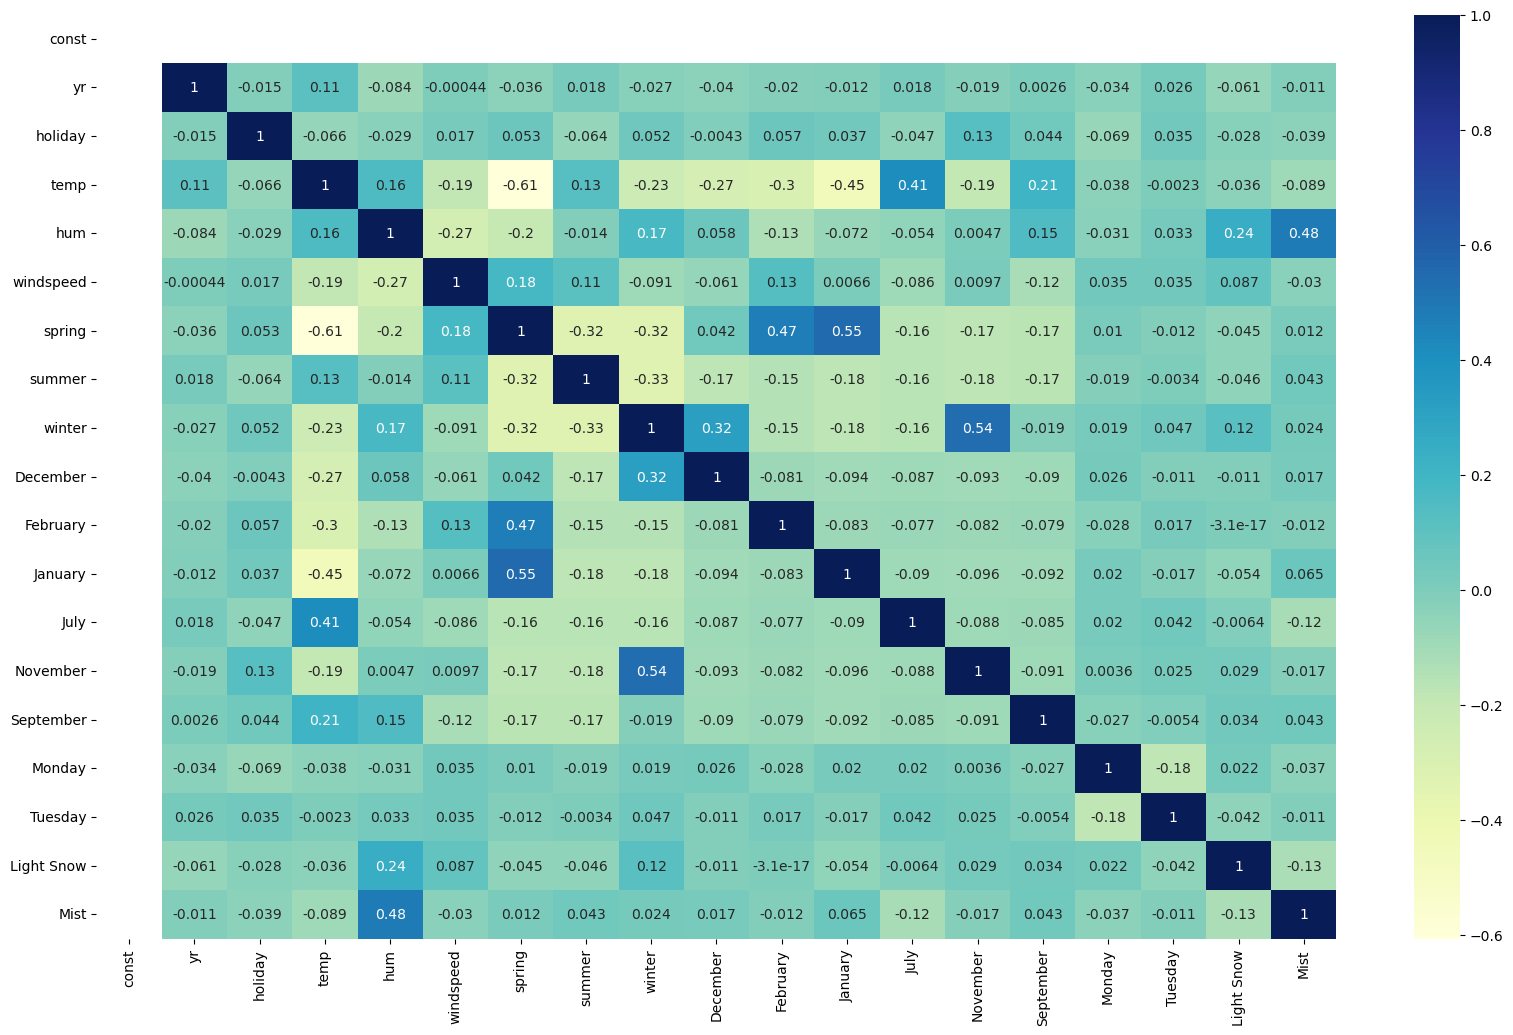

In [79]:
# plotting heatmap to check the correlation

plt.figure(figsize = (20,12))
sns.heatmap(X_train_lm9.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### Dropping Spring Variable because of high VIF value and high correlation with other predictor variable.


In [80]:
X_train_new = X_train_new.drop('spring', axis=1)

In [81]:
# adding constant and fitting the data into the new dataframe

X_train_lm10 = sm.add_constant(X_train_new)
lr10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          4.53e-188
Time:                        14:16:34   Log-Likelihood:                 517.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     492   BIC:                            -923.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -463.7814     16.243    -28.553      0.0

In [82]:
# checking VIF values for all the variables in the new dataframe

vif = pd.DataFrame()
X = X_train_lm10
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif
              

,features,VIF
0,const,16891059.48
3,temp,3.18
7,winter,2.32
10,January,2.27
4,hum,1.92
12,November,1.78
9,February,1.73
6,summer,1.72
8,December,1.66
17,Mist,1.56


#### Hence we can say that, lr10 is the final and perfect model for the dataset because:
1. The P-values and VIF values of all the variables are very low 
2. The F-statistics are very high
3. The R-squared and adjusted R-squared are very high

In [83]:
#Checking all the parameters in the final model
lr10.params

const        -463.781442
yr              0.229966
holiday        -0.092609
temp            0.511872
hum            -0.161257
windspeed      -0.191087
summer          0.061851
winter          0.128847
December       -0.044961
February       -0.050119
January        -0.073393
July           -0.041839
November       -0.038886
September       0.084929
Monday         -0.025972
Tuesday        -0.028219
Light Snow     -0.248558
Mist           -0.054678
dtype: float64

## Residual Analysis of the train data

In [84]:
y_train_pred = lr10.predict(X_train_lm10)

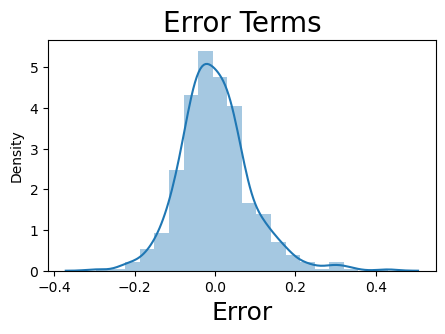

In [85]:
# calculating residuals and plotting it
plt.figure(figsize = (5,3))
res  = y_train_pred - y_train
sns.distplot(res, bins =20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize = 18)
plt.show()

As we can see the residual values are normal around 0.



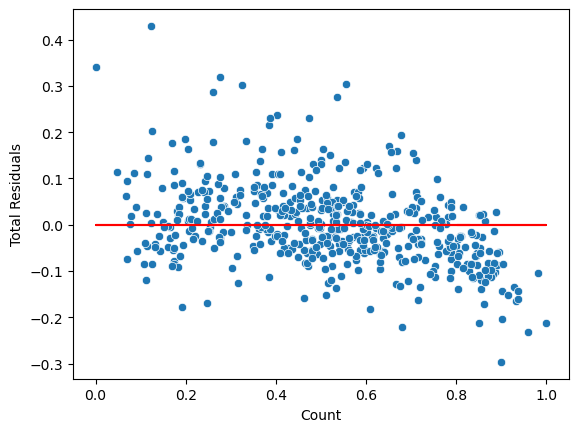

In [86]:
sns.scatterplot(x=y_train,y=res)
plt.plot(y_train,(y_train - y_train), 'r')
plt.xlabel('Count')
plt.ylabel('Total Residuals')
plt.show()

As we can see from the plots :
1. The uniform distribution of scatter points around the line indicates constant error term variance, confirming the presence of homoscedasticity
2. In previous plots, we observed a clear linear relationship between the dependent/target variable and the predictor variables
3. The absence of any discernible pattern indicates that the error terms are independent of each other

## Making Predictions

In [87]:
#### Splitting data

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_var] = scaler.transform(bike_test[num_var])

In [88]:
X_test = bike_test
y_test = bike_test.pop('cnt')

In [89]:
# adding constant variable to test dataframe

X_test_lm10 = sm.add_constant(X_test)

In [90]:
X_test_lm10 = X_test_lm10.drop(['workingday', 'atemp', 'spring', 'August', 'June', 'March', 'May', 'October', 
                               'Saturday', 'Sunday', 'Thursday', 'Wednesday'], axis=1)

In [91]:
X_test_lm10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   summer      220 non-null    uint8  
 7   winter      220 non-null    uint8  
 8   December    220 non-null    uint8  
 9   February    220 non-null    uint8  
 10  January     220 non-null    uint8  
 11  July        220 non-null    uint8  
 12  November    220 non-null    uint8  
 13  September   220 non-null    uint8  
 14  Monday      220 non-null    uint8  
 15  Tuesday     220 non-null    uint8  
 16  Light Snow  220 non-null    uint8  
 17  Mist        220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(12)
memory usage: 14.6 KB


In [92]:
#Making predictions using the final model.

y_test_pred = lr10.predict(X_test_lm10)

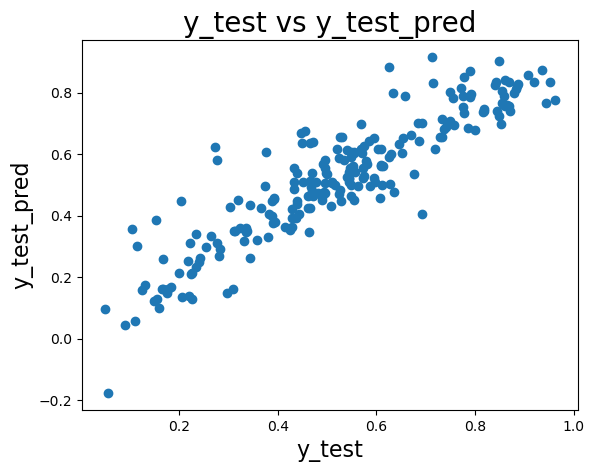

In [93]:
#Plotting y_test vs y_pred to understand the variance

plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize =20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()


## R2 Score for the dataframe

In [94]:
# importing the library

from sklearn.metrics import r2_score

In [95]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8196458169704868

#### The test dataset's R2 score, closely aligned with the impressive 0.847 achieved during training dataset, which signifies the robust and effective model

## Outcomes

In [96]:
lr10.params

const        -463.781442
yr              0.229966
holiday        -0.092609
temp            0.511872
hum            -0.161257
windspeed      -0.191087
summer          0.061851
winter          0.128847
December       -0.044961
February       -0.050119
January        -0.073393
July           -0.041839
November       -0.038886
September       0.084929
Monday         -0.025972
Tuesday        -0.028219
Light Snow     -0.248558
Mist           -0.054678
dtype: float64

#### The model highlights key features influencing bike rentals:

1. Temperature (temp): With a positive coefficient of 0.511872, rising temperatures positively impact bike rentals. As the temperature increases, there is an observed increase in the number of bike rentals. 

2. Year (yr): With a positive coefficient of 0.229966, the 'yr' variable signifies a positive impact on bike rentals over time. As the years progress, there is an observable increase in the popularity of shared bike services.

3. Light Snow (Light_Snow): Indicated by a negative coefficient of -0.239606, the presence of light snow emerges as a deterrent to bike rentals. Unfavorable weather conditions, such as light snow, contribute to a decrease in the preference for bike sharing.

## Conclusion

To optimize profits in bike-sharing, prioritize key features. Capitalize on temperature's impact by expanding services in summer months, leveraging the positive correlation between warmer weather and heightened bike rentals. This streamlined strategy offers a direct route to enhancing profitability.